In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

# Cleaning up SHIPS Data

## Reading Data

In [109]:
PATH = '/home/disk/orca/adaley17/Research/Stress_Separation/' #PATH to the data
Cleaned_Data_Path = '/home/disk/orca/adaley17/MLGEO2024_TC_Tracks_Intensity/data/clean/' #Set path to save PNG Files

with open(PATH + 'lsdiaga_1982_2022_sat_ts_5day.txt', 'r') as file: # Open the file
    # Move the file pointer to the beginning of the file
    file.seek(0)
    lines = [file.readline().split() for _ in range(1925149)] # Read the first 1925149 lines


## Functions

In [127]:
def extract_data_of_interest(start, lines,data_of_interest, increment):
    """
    This function extracts the data of interest from the text file. It takes the starting index,
    the lines of the file and the data_of_interest array as input. To get more information about the 
    raw data see the README file.
    """
    count=0 #Counter variable
    for i in range(start, len(lines), increment): #The data is stored in a 139x22 matrix, so we need to skip 139 lines to get to the next time period
        # print(i, lines[i])
        for j in range(len(lines[i])-1): #Here we are skipping the last element of the line which is the variable name
            data_of_interest[count:,] = lines[i][j] #Assign the data to the data_of_interest array
            count+=1 #Increment the counter

        return data_of_interest; #Return the data of interest

def extract_names_and_codes(start, lines, increment, num_predictions, data, choice):

    #Choice is the index of the variable name we want to extract, 0 for names and -2 for codes
    count=0 #Counter variable
    for i in range(start, len(lines), increment): #The data is stored in a 139x22 matrix, so we need to skip 139 lines to get to the next time period
        # print(lines[i][choice])
        # names_and_codes = [lines[i][choice][:6]] * num_predictions
        names_and_codes = [lines[i][choice]] * num_predictions #every time period has 22 predictions but the storm name is the same for all of them
        data[count*22:(count+1)*22, :] = np.array(names_and_codes).reshape(-1, 1) #Reshape the array to be a column vector and assign it to the data array

        count+=1 #Increment the counter

    return data

def extract_original_info(start, lines, increment, num_predictions, data, choice):
    """
        Extracts initial information from the Header of each prediction
        3 - WSPD
        4 - LAT
        5 - LON
        6 - PRES
    """

    #Choice is the index of the variable name we want to extract, 0 for names and -2 for codes
    count=0 #Counter variable
    for i in range(start, len(lines), increment): #The data is stored in a 139x22 matrix, so we need to skip 139 lines to get to the next time period

        names_and_codes = [lines[i][choice]] * num_predictions #every time period has 22 predictions but the storm name is the same for all of them
        data[count*22:(count+1)*22, :] = np.array(names_and_codes).reshape(-1, 1) #Reshape the array to be a column vector and assign it to the data array

        count+=1 #Increment the counter

    return data

def get_original_times(start, lines, increment, data, num_predictions):
    
    count = 0
    for i in range(start, len(lines), increment):
        date_str = str(lines[i][1] + lines[i][2])
        date_obj = [np.datetime64(datetime.strptime(date_str, '%y%m%d%H'), 's')] * num_predictions
        data[count * num_predictions:(count + 1) * num_predictions, :] = np.array(date_obj).reshape(-1, 1)
        count += 1 
    return data

## Creating Empty Arrays and Setting Dependencies

In [138]:
size = 13850 * 22 #Number of time periods * number of predictions per time period

num_predictions = 22 #Number of predictions per time period
num_time_periods = 13850 #Number of time periods
size = num_time_periods * num_predictions #Number of time periods * number of predictions per time period
increment = 139 #Number of lines per time period

#Creating Empty Arrays to store the data

##Original Data
original_times = np.full((size, 1), np.datetime64('NaT', 's'))
original_wspd = np.full((size, 1), np.nan)
original_lat = np.full((size, 1), np.nan)
original_lon = np.full((size, 1), np.nan)
original_pres = np.full((size, 1), np.nan)

##Predicted Data
times = np.full((size, 1), np.nan)
lat = np.full((size, 1), np.nan)
lon = np.full((size, 1), np.nan)
vmax = np.full((size, 1), np.nan)
mslp = np.full((size, 1), np.nan)
nature = np.full((size, 1), np.nan)
delta_intensity = np.full((size, 1), np.nan)
name = np.full((size, 1), 'np.nan')
code = np.full((size, 1), 'np.nan')
daily_sst_avg = np.full((size, 1), 'np.nan')
mid_level_rh = np.full((size, 1), np.nan)
vshear = np.full((size, 1), np.nan)
vert_vel = np.full((size, 1), np.nan)


## Extracting Data

In [ ]:

# Extracting Data of interest

##Original Data
original_times = get_original_times(0, lines, increment, original_times, num_predictions)
original_wspd = extract_original_info(0, lines, increment, num_predictions, original_wspd, 3).astype(object)
original_lat = extract_original_info(0, lines, increment, num_predictions, original_lat, 4).astype(object)
original_lon = extract_original_info(0, lines, increment, num_predictions, original_lon, 5).astype(object)
original_pres = extract_original_info(0, lines, increment, num_predictions, original_pres, 6).astype(object)

##Predicted Data
name = extract_names_and_codes(0, lines,increment, num_predictions, name, 0).astype(object)
code = extract_names_and_codes(0, lines, increment, num_predictions, code, 7).astype(object)  # Fixed the bug by ensuring the function does not truncate the last 2 characters
times = extract_data_of_interest(1, lines, times , increment).astype(object)
vmax = extract_data_of_interest(2, lines, vmax, increment).astype(object)
mslp = extract_data_of_interest(3, lines, mslp, increment).astype(object)
nature = extract_data_of_interest(4, lines, nature, increment).astype(object)
delta_intensity = extract_data_of_interest(5, lines, delta_intensity, increment).astype(object)
lat = extract_data_of_interest(8, lines, lat, increment).astype(object)
lon = extract_data_of_interest(9, lines, lon, increment).astype(object)
daily_sst_avg = extract_data_of_interest(19, lines, daily_sst_avg, increment).astype(object)
mid_level_rh = extract_data_of_interest(29, lines, mid_level_rh, increment).astype(object)
vshear = extract_data_of_interest(64, lines, vshear, increment).astype(object)
vert_vel = extract_data_of_interest(67, lines, vert_vel, increment).astype(object)


## Cleaning Up Data

In [ ]:

#Changing 9999 to nans and converting units
original_wspd[original_wspd == 9999] = np.nan
original_wspd = original_wspd * 0.514444 #Convert original_wspd from knots to meters per second
original_pres[original_pres == 9999] = np.nan
original_lat[original_lat == 9999] = np.nan
original_lon[original_lon == 9999] = np.nan

lat[lat == 9999] = np.nan
lat = lat / 10 #Convert latitude from tenths of degrees to degrees

lon[lon == 9999] = np.nan
lon = lon / 10 #Convert longitude from tenths of degrees to degrees

vmax[vmax==9999] = np.nan
vmax = vmax * 0.514444 #Convert vmax from knots to meters per second

mslp[mslp == 9999] = np.nan

nature[nature == 9999] = np.nan
nature[nature == 0] = 'Wave'
nature[nature == 1] = 'Tropical'
nature[nature == 2] = 'Subtropical'
nature[nature == 3] = 'Extratropical'

mid_level_rh[mid_level_rh == '9999'] = np.nan

daily_sst_avg[daily_sst_avg == '9999'] = np.nan
daily_sst_avg[daily_sst_avg == 'DSTA'] = np.nan
daily_sst_avg = pd.to_numeric(daily_sst_avg.flatten(), errors='coerce') / 10

vshear[vshear == 9999] = np.nan
vshear = vshear / 10
vshear = vshear * 0.514444 # Convert vertical shear from knots to meters per second

vert_vel[vert_vel == 9999] = np.nan
vert_vel = vert_vel / 100
vert_vel = vert_vel * 0.514444 # Convert vertical velocity from knots to meters per second




## Creating Dataframe, doing Final Clean and Saving

In [ ]:

# Create a DataFrame with the extracted data
data = {
    'Original_Times': original_times.flatten(),
    'Original_Lat': original_lat.flatten(),
    'Original_Lon': original_lon.flatten(),
    'Original_WSPD': original_wspd.flatten(),
    'Original_Pres': original_pres.flatten(),
    'Name': name.flatten(),
    'Code': code.flatten(),
    'Times': times.flatten(),
    'Latitude': lat.flatten(),
    'Longitude': lon.flatten(),
    'Vmax': vmax.flatten(),
    'MSLP': mslp.flatten(),
    'Nature': nature.flatten(),
    'Delta_Intensity': delta_intensity.flatten(),
    'Daily_SST_Avg': daily_sst_avg.flatten(),
    'Mid_Level_RH': mid_level_rh.flatten(),
    'Vshear': vshear.flatten(),
    'Vert_Vel': vert_vel.flatten()
}

df = pd.DataFrame(data)

#Adjusting codes since the last two characters are being truncated
adjusted_code = extract_names_and_codes(0, lines, increment, num_predictions, code, 7).astype(object)
df['Code'] = adjusted_code.flatten()

df[df==9999] = np.nan

#Saving
df.to_csv(Cleaned_Data_Path + 'cleaned_SHIPS_data.csv', index=True)

In [139]:
df

,Original_Times,Original_Lat,Original_Lon,Original_WSPD,Original_Pres,Name,Code,Times,Latitude,Longitude,Vmax,MSLP,Nature,Delta_Intensity,Daily_SST_Avg,Mid_Level_RH,Vshear,Vert_Vel
0,1982-06-02 12:00:00,21.7,87.1,10.28888,1005.0,ALBE,AL011982,-12.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,57.0,15.227542,6.631183
1,1982-06-02 12:00:00,21.7,87.1,10.28888,1005.0,ALBE,AL011982,-6.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,53.0,15.536209,3.966363
2,1982-06-02 12:00:00,21.7,87.1,10.28888,1005.0,ALBE,AL011982,0.0,21.7,87.1,10.28888,1005.0,Tropical,0.0,27.1,56.0,15.330431,4.403641
3,1982-06-02 12:00:00,21.7,87.1,10.28888,1005.0,ALBE,AL011982,6.0,22.2,86.5,12.8611,1004.0,Tropical,0.0,27.8,59.0,18.622873,5.37594
4,1982-06-02 12:00:00,21.7,87.1,10.28888,1005.0,ALBE,AL011982,12.0,22.6,85.8,15.43332,1003.0,Tropical,0.0,27.9,53.0,17.491096,4.156708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304695,2022-11-11 12:00:00,33.2,84.6,12.8611,999.0,NICO,AL172022,120.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
304696,2022-11-11 12:00:00,33.2,84.6,12.8611,999.0,NICO,AL172022,120.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
304697,2022-11-11 12:00:00,33.2,84.6,12.8611,999.0,NICO,AL172022,120.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
304698,2022-11-11 12:00:00,33.2,84.6,12.8611,999.0,NICO,AL172022,120.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


<AxesSubplot:>

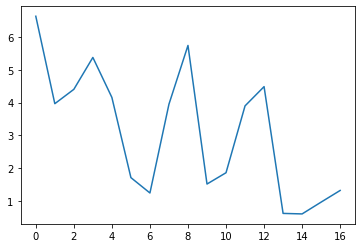

In [144]:
df.Vert_Vel.plot()

In [71]:
times = np.full((len(lines[1])-1, 1), 'np.nan')
vmax = np.full((len(lines[2])-1, 1), 'np.nan')
mslp = np.full((len(lines[3])-1, 1), 'np.nan')
nature = np.full((len(lines[4])-1, 1), 'np.nan')
delta_intensity = np.full((len(lines[5])-1, 1), 'np.nan')
lat = np.full((len(lines[8])-1, 1), 'np.nan')
lon = np.full((len(lines[9])-1, 1), 'np.nan')
daily_sst_avg = np.full((len(lines[19])-1, 1), 'np.nan')
mid_level_rh = np.full((len(lines[29])-1, 1), np.nan)

shear = np.full((len(lines[64])-1, 1), np.nan)
""" Generalized 850-200 hPa shear magnitude (kt *10) vs time (takes into account all levels from 1000 to 100 hPa) """ 
vert_vel = np.full((len(lines[67])-1, 1), np.nan)


# Times
for i in range(len(lines[1])-1):
    times[i,:] = lines[1][i]

# Vmax
for i in range(len(lines[2])-1):
    vmax[i,:] = lines[2][i]

# MSLP
for i in range(len(lines[3])-1):
    mslp[i,:] = lines[3][i]

# Nature
for i in range(len(lines[4])-1):
    nature[i,:] = lines[4][i]

# Delta Intensity
for i in range(len(lines[5])-1):
    delta_intensity[i,:] = lines[5][i]

# Latitude
for i in range(len(lines[8])-1):
    lat[i,:] = lines[8][i]

# Longitude
for i in range(len(lines[9])-1):
    lon[i,:] = lines[9][i]

# Daily SST Avg
for i in range(len(lines[19])-1):
    # print(i)
    daily_sst_avg[i,:] = lines[19][i]

# Mid Level RH
for i in range(len(lines[29])-1):
    mid_level_rh[i,:] = float(lines[29][i])

# Shear
for i in range(len(lines[64])-1):
    shear[i,:] = float(lines[64][i])/10

# Vert Vel
for i in range(len(lines[67])-1):
    vert_vel[i,:] = float(lines[67][i])/100


    

In [73]:
daily_sst_avg.shape

(24, 1)

In [46]:
### Mu-Chieh Ko,Xiaomin Chen, Miroslav Kubat and Sundararaman Gopalakrishnan
delv = np.full((len(lines[6])-1, 1), np.nan)
incv = np.full((len(lines[7])-1, 1), np.nan)
lat = np.full((len(lines[8])-1, 1), np.nan)
lon = np.full((len(lines[9])-1, 1), np.nan)
dist_to_land = np.full((len(lines[14])-1, 1), np.nan)
daily_sst_avg = np.full((len(lines[19])-1, 1), np.nan)
mid_level_rh = np.full((len(lines[29])-1, 1), np.nan)
div_200 = np.full((len(lines[33])-1, 1), np.nan)
rad_max_wind = np.full((len(lines[-7])-1, 1), np.nan) #Needs further investifgation since the brightness temp is used
shear = np.full((len(lines[64])-1, 1), np.nan) #Generalized 850-200 hPa shear magnitude (kt *10) vs time (takes into account all levels from 1000 to 100 hPa) """ 

#ShearS
#ShdirS
#ShearM
#ShdirM
#ShearD
#ShdirD
#CAPE_US
#CAPE_DS
# HLCY_US
# HLCY_DS
#Convergence
#Temperature Difference between core and environment
# Wavenumber1




# Delta V
for i in range(len(lines[6])-1):
    delv[i,:] = float(lines[6][i])

# Inc V
for i in range(len(lines[7])-1):
    incv[i,:] = float(lines[7][i])

# Latitude
for i in range(len(lines[8])-1):
    lat[i,:] = float(lines[8][i])

# Longitude
for i in range(len(lines[9])-1):
    lon[i,:] = float(lines[9][i])

# Distance to Land
for i in range(len(lines[14])-1):
    dist_to_land[i,:] = float(lines[14][i])
    dist_to_land[dist_to_land == 9999.] = np.nan
    
# Daily SST Avg
for i in range(len(lines[19])-2):
    daily_sst_avg[i,:] = float(lines[19][i])
    daily_sst_avg[daily_sst_avg == 9999.] = np.nan

# Mid Level RH
for i in range(len(lines[29])-1):
    mid_level_rh[i,:] = float(lines[29][i])
    mid_level_rh[mid_level_rh == 9999.] = np.nan

# Div 200
for i in range(len(lines[33])-1):
    div_200[i,:] = float(lines[33][i])
    div_200[div_200 == 9999.] = np.nan

# Shear
for i in range(len(lines[64])-1):
    shear[i,:] = float(lines[64][i])/10 #Convert to m/s

# Rad Max Wind
for i in range(len(lines[-7])-1):
    rad_max_wind[i,:] = float(lines[-7][i])
    rad_max_wind[rad_max_wind == 9999.] = np.nan



In [47]:
div_200

array([[ 64.],
       [ 65.],
       [ 84.],
       [ 70.],
       [ 51.],
       [114.],
       [ 42.],
       [ 27.],
       [ -7.],
       [  8.],
       [-17.],
       [-37.],
       [-48.],
       [-52.],
       [-25.],
       [-32.],
       [-41.],
       [ nan],
       [ nan],
       [ nan],
       [ nan]])

In [32]:
# Extract the substring
substring = combined_line[0:46]

# Split the combined_line into a list of strings
combined_line_list = combined_line.split()

# Find the index of the substring in the list
start_index = combined_line_list.index(substring)

# Print every 4th string after the substring
for i in range(start_index, len(combined_line_list), 4):
    print(combined_line_list[i])

ValueError: ' ALBE 820602 12   20   21.7   87.1 1005 AL0119' is not in list

In [34]:
combined_line_list[-1]

'LAST'

In [ ]:
import xarray as xr

# Assuming you have an xarray DataArray named 'data_array'
nan_indices = np.argwhere(data_array.isnull().values)
print(nan_indices)